<a href="https://colab.research.google.com/github/amgurkas/adv-programming/blob/main/assignment_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 9**

In [ ]:
# core
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ml
from sklearn import datasets as ds
from sklearn import linear_model as lm
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split as tts

#plotly or other graphing library
import plotly.express as px

In [ ]:
# Load datasets here once and assign to variables iris and boston
iris = ds.load_iris()

# Loading boston data from URL because it was removed from scikit-learn
# boston = ds.load_boston()

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

boston_data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
boston_target = raw_df.values[1::2, 2]

# Manually define feature names based on common knowledge of the Boston Housing dataset
boston_feature_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'
]

boston_df_full = pd.DataFrame(data=boston_data, columns=boston_feature_names)
boston_df_full['target'] = boston_target

display("Boston Housing Dataset (first 5 rows):", boston_df_full.head())


<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-3549470321.py:8: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


'Boston Housing Dataset (first 5 rows):'

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**Q1**

**Data set: Iris**

* Return the first 5 rows of the data including the feature names as column headings in a DataFrame and a
separate Python list containing target names

In [ ]:
iris_df = pd.DataFrame(data=iris.data[:5], columns=iris.feature_names)
target_names_list = list(iris.target_names)

display("First 5 rows of Iris dataset:", iris_df)
display("Target names:", target_names_list)

boston_df = pd.DataFrame(data=boston.data[:5], columns=boston.feature_names)
display("First 5 rows of Boston dataset:", boston_df)

'First 5 rows of Iris dataset:'

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


'Target names:'

[np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]

'First 5 rows of Boston dataset:'

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


**Q2**

**Data set: Iris**

* Fit the Iris dataset into a kNN model with neighbors=5 and predict the category of observations passed in
argument new_observations. Return back the target names of each prediction (and not their encoded values,
 i.e. return setosa instead of 0).

In [ ]:
def predict_iris_knn(new_observations, n_neighbors=5):
    knn = KNN(n_neighbors=n_neighbors)
    knn.fit(iris.data, iris.target)
    predictions_encoded = knn.predict(new_observations)
    predicted_target_names = [iris.target_names[p] for p in predictions_encoded]
    return predicted_target_names


new_observations = np.array([
    # setosa col
    [5.1, 3.5, 1.4, 0.2],
    # versicolor col
    [6.0, 3.0, 4.0, 1.5],
    # versicolor
    [7.0, 3.2, 4.7, 1.4]
])

predicted_names = predict_iris_knn(new_observations, n_neighbors=5)
display("Predictions for new observations:", predicted_names)

'Predictions for new observations:'

[np.str_('setosa'), np.str_('versicolor'), np.str_('versicolor')]

**Q3**

**Data set: Iris**

* Split the Iris dataset into a train / test model with the split ratio between the two established by the function parameter split.

* Fit KNN with the training data with number of neighbors equal to the function parameter neighbors

* Generate and return back an accuracy score using the test data that was split out

In [ ]:
def calculate_knn_accuracy(iris_dataset, split, neighbors):
    X = iris_dataset.data
    y = iris_dataset.target

    X_train, X_test, y_train, y_test = tts(X, y, test_size=split, random_state=42)

    knn = KNN(n_neighbors=neighbors)
    knn.fit(X_train, y_train)

    accuracy_score = knn.score(X_test, y_test)
    return accuracy_score

# Test the function
# define the split ratio
split_ratio_example = 0.3
# set n value to 5
n_neighbors_example = 5
# calculate the accuracy
accuracy_score = calculate_knn_accuracy(iris, split_ratio_example, n_neighbors_example)
display(f"Accuracy for Iris dataset with split ratio {split_ratio_example} and {n_neighbors_example} neighbors: {accuracy_score:.2f}")

# Accuracy value = 1 or (100%) this means the model predicted every value correctly.
# This that all iris flowers were classified into their correct species by the model.

'Accuracy for Iris dataset with split ratio 0.3 and 5 neighbors: 1.00'

**Q4**

**Data set: Iris**

* Generate an overfitting / underfitting curve of kNN each of the testing and training accuracy performance scores series for a range of neighbor (k) values from 1 to 30 and plot the curves (number of neighbors is x-axis, performance score is y-axis on the chart).

In [ ]:
# Plot Overfitting/Underfitting Curves
# Summarize findings

In [ ]:
# Prepare Data Split
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (105, 4)
X_test shape: (45, 4)
y_train shape: (105,)
y_test shape: (45,)


In [ ]:
# Calculate Training and Testing Accuracies
train_accuracies = []
test_accuracies = []
# Iterate through k values from 1 - 30
k_values = range(1, 31)

# looping through k values to train a kNN model on training data
for k in k_values:
    knn = KNN(n_neighbors=k)
    knn.fit(X_train, y_train)
    # checking acurracies and appending to train and test accuracies df
    train_accuracies.append(knn.score(X_train, y_train))
    test_accuracies.append(knn.score(X_test, y_test))

print("Training accuracies calculated successfully.")
print("Testing accuracies calculated successfully.")

# Once training and testing accuracies are stored, they can be visualized to
# check for overfitting/underfitting curve

Training accuracies calculated successfully.
Testing accuracies calculated successfully.


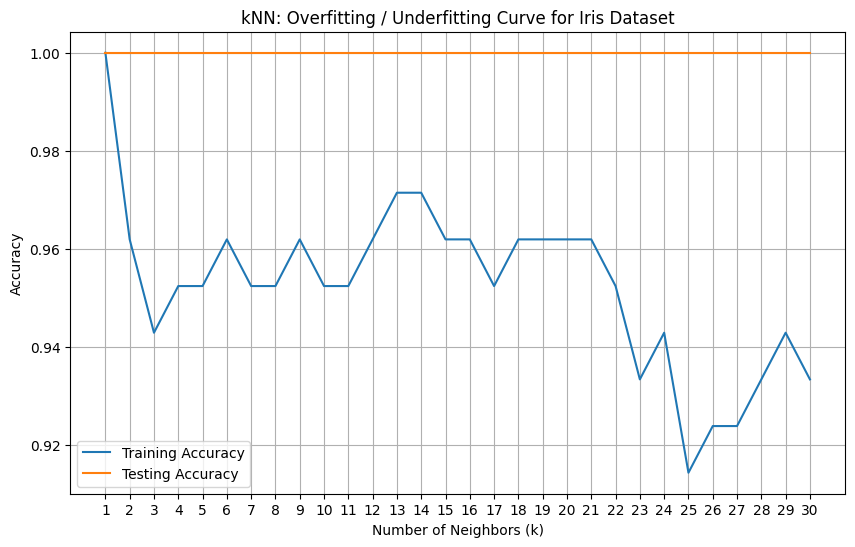

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, label='Training Accuracy')
plt.plot(k_values, test_accuracies, label='Testing Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('kNN: Overfitting / Underfitting Curve for Iris Dataset')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

# Summarize findings
# While the training acurracy decreases as k increases, the testing accuracy
# remains constant. This reflects reduced sensitivity to individual training
# points. The testing accuracy remained constant indicating the kNN model was
# able to perfectly classify all the examples.

# In this case, it seems that the model is well calibrated. If there was
# overfitting, you would expect to see a large and growing gap between the
# training and testing accuracy curves, where the training accuracy is very high
# (often close to 100%) indicating the model learned the training data too well.

# For underfitting, both the training accuracy and testing accuracy would be too
# low. This means the model is too simple to capture the underlying patterns in
# the data, performing poorly even on the data it was trained on.

Summary:
- The Iris dataset was split into training and testing sets, where a kNN model demonstrated high generalization, consistently achieving excellent testing accuracy across 'k' values from 1 to 30.
- While training accuracy generally decreased with increasing 'k', the testing accuracy remained stable and high, indicating the model is robust.
- This suggests the Iris dataset is highly separable, with no significant overfitting or underfitting observed within the tested range.